# Observations and Insights

## Look across all the generated figures and tables and write at least three observations or inferences that can be made from the data.

### Observation 1
### Based off of Mouse-l509's treatment with Capomulin, the tumor volume decreased without affecting his                        weight. Will also need to make a comparison with a female mouse to see if the same outcome occured with this          medication.

### Observation 2
### The mouse distribution for each drug regimen was uneven. The maximum number of mice for Capomulin was            230 and the minimum was 161 for the Propriva regimen. The study might be more concrete if the number of mice        was the same for all regimens.

### Observation 3
###

# Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress
import numpy as np

In [2]:
# Importing study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


# Summary statistics

In [3]:
# Generate a summary statistics table of the tumor volume for each drug regimen.
# It should consist of mean, median, variance, standard deviation, and SEM


# Make dataframe with drug regimen and tumor volume. Set drug regimen as index.
reg_df = mouse_study_df[['Drug Regimen', 'Tumor Volume (mm3)']]

# Filter data to make summary stats
tv_mean = reg_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tv_median = reg_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tv_var = reg_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tv_std = reg_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tv_sem = reg_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# Combine all the stats into a dataframe. Rename the columns
tv_stats = pd.DataFrame({"TV_Mean": tv_mean, "TV_Median": tv_median, "TV_Varience": tv_var, 
                         "TV_Standard Dev.": tv_std, "TV_Standard Error M": tv_sem})
tv_stats.reset_index()

,Drug Regimen,TV_Mean,TV_Median,TV_Varience,TV_Standard Dev.,TV_Standard Error M
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


# Bar plots

Text(0, 0.5, 'Mouse Count')

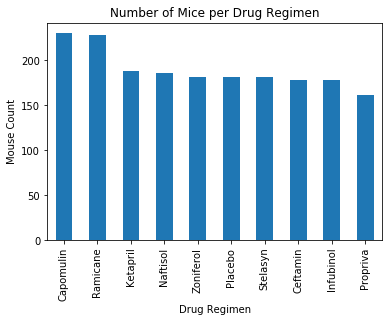

In [4]:
# Generate a bar plot using Pandas's DataFrame.plot() that shows the number of data points for each treatment regimen.

# Make a dataframe of the total mice per drug regimen while creating bar chart
mice_total_df = mouse_study_df["Drug Regimen"].value_counts().plot(kind='bar', title="Number of Mice per Drug Regimen")

# Make a labels for x and y
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Count")

Text(0, 0.5, 'Mouse count')

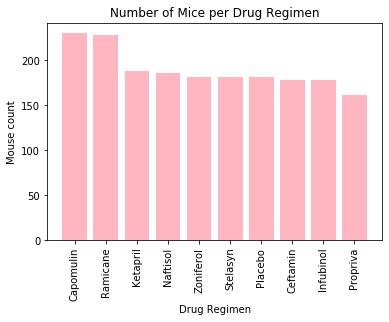

In [5]:
# Generate a bar plot using both Matplotlib's pyplot that shows the number of data points for each treatment regimen.

# Make variables for drug regimen and mouse count
drugs = ['Capomulin','Ramicane', 'Ketapril', 'Naftisol','Zoniferol', 
         'Stelasyn','Placebo','Ceftamin','Infubinol', 'Propriva']
mice_count = [230, 228, 188, 186, 182, 181, 181, 178, 178, 161]
x_axis = np.arange(len(mice_count))

# Creating bar chart based on values above. Add tick marks.
plt.bar(x_axis, mice_count, color="lightpink", align="center",)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation='vertical')

# Label the chart's title, x and y axises
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse count")

# Pie plots

Text(0.5, 1.0, 'Percentage of Female & Male Mice in Study')

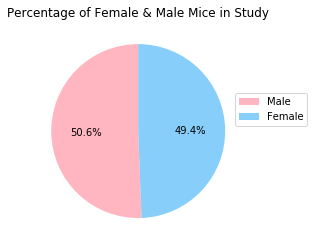

In [6]:
# Generate a pie plot using Matplotlib's pyplot that shows the distribution of female or male mice in the study.

# Make variables for sex and mouse population lables
sex = ['Male','Female']
mouse_samp = [958,935]

# Colors for each section
colors = ['lightpink', 'lightskyblue']

# Creating pie chart based on values above with percentages. Add title.
plt.pie(mouse_samp, colors=colors, autopct="%1.1f%%", startangle=90)
plt.legend(loc='upper right', labels=sex, bbox_to_anchor=(1.3,0.7))
plt.title("Percentage of Female & Male Mice in Study")

Text(0.5, 1.0, 'Percentage of Female & Male Mice in Study')

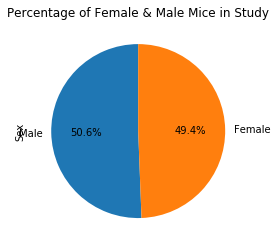

In [7]:
# Generate a pie plot using both Pandas's DataFrame.plot() shows the distribution of female or male mice in the study.

mouse_study_df['Sex'].value_counts().plot(kind='pie', autopct="%1.1f%%", startangle=90)

plt.title("Percentage of Female & Male Mice in Study")

# Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# The four Drug Regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. 

# Filter for the 4 regimens with loc
regimens = mouse_study_df[['Mouse ID', 'Timepoint','Drug Regimen', 'Tumor Volume (mm3)']]
regimens_df = regimens.set_index('Drug Regimen')
four_regimens = regimens_df.loc[['Capomulin','Ceftamin','Infubinol','Ramicane'],['Mouse ID','Timepoint','Tumor Volume (mm3)']] 

# Filter for the max timepoint(45) for each mouse who took one of the 4 regimens
timepoint_max = four_regimens.loc[four_regimens['Timepoint'] == 45]
timepoint_max

# switch columns and rows to prepare for the boxplot
# timepoint_max.transpose()

,Mouse ID,Timepoint,Tumor Volume (mm3)
Drug Regimen,,,
Capomulin,s185,45,23.343598
Capomulin,x401,45,28.484033
Capomulin,m601,45,28.430964
Capomulin,u364,45,31.023923
Capomulin,y793,45,31.896238
...,...,...,...
Ramicane,a411,45,38.407618
Ramicane,e662,45,40.659006
Ramicane,u196,45,40.667713


In [9]:
# Make df for all 4 regimiens to use for quartiles
capolmulin = timepoint_max.loc["Capomulin", :]
ceftamin = timepoint_max.loc["Ceftamin", :]
infubinol = timepoint_max.loc["Infubinol", :]
ramicane = timepoint_max.loc["Ramicane", :]

In [10]:
# Calulating quartiles for final tumor volume (mm3). Final timepoint is at 45.

# ------------------------------------CAPOLUMULIN--------------------------------------
cap_vol = capolmulin["Tumor Volume (mm3)"]
cap_quartiles = cap_vol.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq

print("...................Capomulin Quartile...................")
print(f"Lower quartile of final tumor volume (mm3): {cap_lowerq}")
print(f"Upper quartile of final tumor volume (mm3): {cap_upperq}")
print(f"Interquartile range of final tumor volume (mm3): {cap_iqr}")
print(f"Median of final tumor volume (mm3): {cap_quartiles[0.5]} ")

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Values below {cap_lower_bound} and above {cap_upper_bound} could be outliers.")
print("-------------------------------------------------------------------------")

# ------------------------------------CEFTAMIN--------------------------------------
ceft_vol = ceftamin["Tumor Volume (mm3)"]
ceft_quartiles = ceft_vol.quantile([.25,.5,.75])
ceft_lowerq = ceft_quartiles[0.25]
ceft_upperq = ceft_quartiles[0.75]
ceft_iqr = ceft_upperq-ceft_lowerq

print("...................Ceftamin Quartile...................")
print(f"Lower quartile of final tumor volume (mm3): {ceft_lowerq}")
print(f"Upper quartile of final tumor volume (mm3): {ceft_upperq}")
print(f"Interquartile range of final tumor volume (mm3): {ceft_iqr}")
print(f"Median of final tumor volume (mm3): {ceft_quartiles[0.5]} ")

ceft_lower_bound = ceft_lowerq - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)
print(f"Values below {ceft_lower_bound} and above {ceft_upper_bound} could be outliers.")
print("-------------------------------------------------------------------------")

# ------------------------------------INFUBINOL--------------------------------------
inf_vol = ceftamin["Tumor Volume (mm3)"]
inf_quartiles = inf_vol.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq

print("...................Infubinol Quartile...................")
print(f"Lower quartile of final tumor volume (mm3): {inf_lowerq}")
print(f"Upper quartile of final tumor volume (mm3): {inf_upperq}")
print(f"Interquartile range of final tumor volume (mm3): {inf_iqr}")
print(f"Median of final tumor volume (mm3): {inf_quartiles[0.5]} ")

inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Values below {inf_lower_bound} and above {inf_upper_bound} could be outliers.")
print("-------------------------------------------------------------------------")

# ------------------------------------RAMICANE--------------------------------------
rami_vol = ceftamin["Tumor Volume (mm3)"]
rami_quartiles = rami_vol.quantile([.25,.5,.75])
rami_lowerq = rami_quartiles[0.25]
rami_upperq = rami_quartiles[0.75]
rami_iqr = rami_upperq-rami_lowerq

print("...................Ramicane Quartile...................")
print(f"Lower quartile of final tumor volume (mm3): {rami_lowerq}")
print(f"Upper quartile of final tumor volume (mm3): {rami_upperq}")
print(f"Interquartile range of final tumor volume (mm3): {rami_iqr}")
print(f"Median of final tumor volume (mm3): {rami_quartiles[0.5]} ")

rami_lower_bound = rami_lowerq - (1.5*rami_iqr)
rami_upper_bound = rami_upperq + (1.5*rami_iqr)
print(f"Values below {rami_lower_bound} and above {rami_upper_bound} could be outliers.")
print("-------------------------------------------------------------------------")

...................Capomulin Quartile...................
Lower quartile of final tumor volume (mm3): 32.37735684
Upper quartile of final tumor volume (mm3): 40.1592203
Interquartile range of final tumor volume (mm3): 7.781863460000004
Median of final tumor volume (mm3): 37.31184577 
Values below 20.70456164999999 and above 51.83201549 could be outliers.
-------------------------------------------------------------------------
...................Ceftamin Quartile...................
Lower quartile of final tumor volume (mm3): 61.43389223
Upper quartile of final tumor volume (mm3): 67.52748237
Interquartile range of final tumor volume (mm3): 6.093590140000003
Median of final tumor volume (mm3): 64.29983003 
Values below 52.29350701999999 and above 76.66786758 could be outliers.
-------------------------------------------------------------------------
...................Infubinol Quartile...................
Lower quartile of final tumor volume (mm3): 61.43389223
Upper quartile of final tum

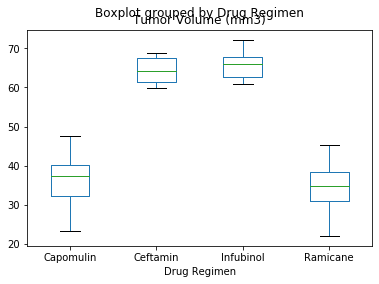

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

timepoint_max.boxplot(by="Drug Regimen", column=["Tumor Volume (mm3)"], grid= False)

# Line Plot

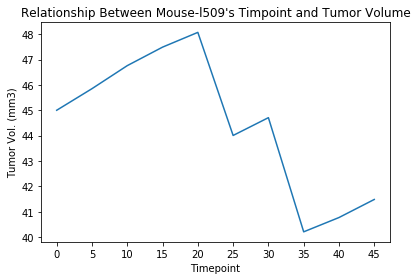

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse(mouse ID l509) treated with Capomulin

# Create df for mouse 1509
mouse_l509_df = mouse_study_df.loc[mouse_study_df["Mouse ID"] == "l509"]

# Filter mousel509 df for time point and tumor vol
l509_time_vol = mouse_l509_df[['Mouse ID','Timepoint','Tumor Volume (mm3)']]

# Set Mouse ID as index
l509_time_vol.set_index(['Mouse ID'])

#--------------------------------------------------------------------------------------------

# Set axises for line plot
x_axis = l509_time_vol["Timepoint"]
y_axis = l509_time_vol["Tumor Volume (mm3)"]

# Make line plot
plt.plot(x_axis,y_axis)
tick_points = [value for value in x_axis]
plt.xticks(tick_points,x_axis)

# Make labels for the graph
plt.title("Relationship Between Mouse-l509's Timpoint and Tumor Volume")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Vol. (mm3)")

plt.tight_layout()
plt.show()

#  Scatter Plot

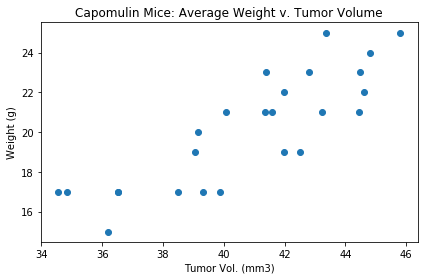

In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Use loc to filter data for Capomulin
capomulin_df = mouse_study_df.loc[mouse_study_df["Drug Regimen"] == "Capomulin"]

# Make new df that just focuses on mouse id, weight, and tumor vol from capomulin_df
capomulin_vol_g = capomulin_df[['Mouse ID', 'Weight (g)','Tumor Volume (mm3)']]

# Groupby Mouse ID and calculate tumor volume and weight average 
avg_capomulin_vol = capomulin_vol_g.groupby('Mouse ID').mean()['Tumor Volume (mm3)']
avg_capomulin_g = capomulin_vol_g.groupby('Mouse ID').mean()['Weight (g)']

# Merge the two dataframes from above groupbys
avg_capomulin_volg = pd.merge(avg_capomulin_vol, avg_capomulin_g, on="Mouse ID")

#----------------------------------------------------------------------------------------

# Set axises for line plot
x_axis = avg_capomulin_volg["Tumor Volume (mm3)"]
y_axis = avg_capomulin_volg['Weight (g)']

# Make scatter plot and label graph
plt.scatter(x_axis,y_axis)
plt.title("Capomulin Mice: Average Weight v. Tumor Volume")
plt.xlabel("Tumor Vol. (mm3)")
plt.ylabel("Weight (g)")

plt.tight_layout()
plt.show()

The correlation between weight (g) and tumor volume (mm3) is 0.84
y = 0.74x + -10.15


Text(0, 0.5, 'Weight (g)')

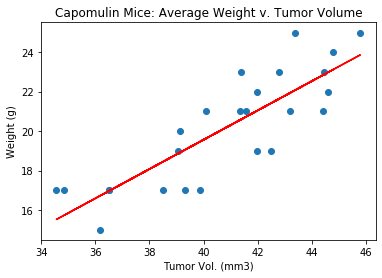

In [14]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Calculate correlation coefficient between weight and average tumor volume
correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f'The correlation between weight (g) and tumor volume (mm3) is {round(correlation[0],2)}')

# Make linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept, 2))

# Copy scatter plot from above and combine linear regression model
plt.scatter(x_axis,y_axis)
plt.plot(x_axis, regress_values, 'r-')
print(line_eq)
plt.title("Capomulin Mice: Average Weight v. Tumor Volume")
plt.xlabel("Tumor Vol. (mm3)")
plt.ylabel("Weight (g)")